# Predict car prices

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. 

They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. <br /> 
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Import necessary libraries
import kagglehub
import shutil
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # Linear regression model
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import mlflow
import mlflow.sklearn


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [307]:
# # Download latest version
# path = kagglehub.dataset_download("hellbuoy/car-price-prediction")
# # print("Path to dataset files:", path)

# # Define a new visible folder
# destination_path = "/Users/user/Desktop/Portfolio/ML/Kaggle_datasets"
# os.makedirs(destination_path, exist_ok=True)

# # Move all files from the hidden folder to the new location
# for file_name in os.listdir(path):
#     print(file_name)
#     shutil.move(os.path.join(path, file_name), destination_path)


# print("Dataset moved to:", destination_path)

In [308]:
# data_dict = {
#     "variable": [
#         "Car_ID", "Symboling", "carCompany", "fueltype", "aspiration", "doornumber",
#         "carbody", "drivewheel", "enginelocation", "wheelbase", "carlength",
#         "carwidth", "carheight", "curbweight", "enginetype", "cylindernumber",
#         "enginesize", "fuelsystem", "boreratio", "stroke", "compressionratio",
#         "horsepower", "peakrpm", "citympg", "highwaympg", "price"
#     ],
#     "description": [
#         "Unique id of each observation (Integer)",
#         "Its assigned insurance risk rating. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (Categorical)",
#         "Name of car company (Categorical)",
#         "Car fuel type i.e. gas or diesel (Categorical)",
#         "Aspiration used in a car (Categorical)",
#         "Number of doors in a car (Categorical)",
#         "Body of car (Categorical)",
#         "Type of drive wheel (Categorical)",
#         "Location of car engine (Categorical)",
#         "Wheelbase of car (Numeric)",
#         "Length of car (Numeric)",
#         "Width of car (Numeric)",
#         "Height of car (Numeric)",
#         "The weight of a car without occupants or baggage. (Numeric)",
#         "Type of engine (Categorical)",
#         "Cylinder placed in the car (Categorical)",
#         "Size of car (Numeric)",
#         "Fuel system of car (Categorical)",
#         "Boreratio of car (Numeric)",
#         "Stroke or volume inside the engine (Numeric)",
#         "Compression ratio of car (Numeric)",
#         "Horsepower (Numeric)",
#         "Car peak rpm (Numeric)",
#         "Mileage in city (Numeric)",
#         "Mileage on highway (Numeric)",
#         "Price of car (Numeric)"
#     ]
# }

# # Converting the dictionary to a pandas DataFrame
# df_data_dict = pd.DataFrame(data_dict)
# df_data_dict.to_csv('/Users/user/Desktop/Portfolio/ML/Kaggle_datasets/CarPrice/data_dict.csv', index=False)

In [309]:
# # A DataFrame for the data dictionary based on "/Users/user/Desktop/Portfolio/ML/Kaggle_datasets/CarPrice"
# # Also https://archive.ics.uci.edu/dataset/10/automobile

# data_dict = pd.read_csv('/Users/user/Desktop/Portfolio/ML/Kaggle_datasets/CarPrice/data_dict.csv')
# data_dict

Add 2 more columns to the car to describe 
1. The influence of each description
2. full meanings of abbreviations if important

In [310]:
# additional_data_dict = { "influence": [
#         "No direct influence; identifier column.",
#         "Lower symboling values are safer; -3 is safest.",
#         "Car company can influence brand perception and price.",
#         "Diesel is often more fuel-efficient; gas has better acceleration.",
#         "Std (naturally aspirated) is simpler, cheaper, and more reliable. Turbo gives more power but may require more maintenance.",
#         "4 doors are typically more practical than 2 doors.",
#         "Carbody affects style, space, and aerodynamics.",
#         "Drivewheel affects traction and handling (e.g., 4WD is better for off-road).",
#         "Front-engine layout is common and efficient; rear-engine provides unique balance and handling.",
#         "Longer wheelbase improves stability; shorter wheelbase increases agility.",
#         "Longer cars often have more interior space.",
#         "Wider cars offer better stability and comfort.",
#         "Taller cars may provide more headroom but higher center of gravity.",
#         "Higher curb weight often means better stability but worse fuel efficiency.",
#         "Enginetype affects performance and maintenance complexity.",
#         "More cylinders generally mean more power but less fuel efficiency.",
#         "Larger engines provide more power but consume more fuel.",
#         "Fuelsystem influences performance and fuel efficiency; e.g., mpfi is more advanced than carburetors.",
#         "Higher boreratio can increase RPMs, favoring performance.",
#         "Larger stroke generally increases torque, favoring efficiency.",
#         "Higher compression ratio improves power and efficiency but requires high-octane fuel.",
#         "Higher horsepower means better acceleration and performance.",
#         "Higher peakrpm allows for more power at high speeds.",
#         "Higher citympg indicates better urban fuel efficiency.",
#         "Higher highwaympg indicates better fuel efficiency for long trips.",
#         "Higher price reflects better quality, features, or brand value."
#     ],
#     "full_meanings": [
#         "N/A",
#         "Insurance risk rating: +3 (high risk) to -3 (low risk).",
#         "N/A",
#         "Fuel type: 'gas' (gasoline) or 'diesel'.",
#         "'Aspiration': 'std' (naturally aspirated) or 'turbo' (turbocharged).",
#         "Number of doors: '2' or '4'.",
#         "Car body styles: sedan, hatchback, etc.",
#         "Drive wheel types: 'fwd' (front-wheel drive), 'rwd' (rear-wheel drive), '4wd' (four-wheel drive).",
#         "Engine location: front or rear.",
#         "Wheelbase: Distance between front and rear axles (inches).",
#         "Car length: Bumper-to-bumper length (inches).",
#         "Car width: Side-to-side width (inches).",
#         "Car height: Ground to roof height (inches).",
#         "Curb weight: Car weight without passengers or luggage (pounds).",
#         "Engine types: 'dohc', 'ohc', etc.",
#         "Number of cylinders in the engine.",
#         "Engine displacement size (cc).",
#         "Fuel system: e.g., 'mpfi' (multi-point fuel injection), '2bbl' (2-barrel carburetor).",
#         "Boreratio: Cylinder diameter to stroke length ratio.",
#         "Stroke: Distance a piston moves inside the cylinder (inches).",
#         "Compression ratio: Ratio of cylinder volume at BDC to TDC.",
#         "Horsepower: Engine power output (hp).",
#         "Peak revolutions per minute (RPM) the engine can reach.",
#         "City miles per gallon (mpg).",
#         "Highway miles per gallon (mpg).",
#         "Car price (USD)."
#     ]
# }

# # Converting the dictionary to a pandas DataFrame
# additional_df_data_dict = pd.DataFrame(additional_data_dict)

In [311]:
# dfs = [df_data_dict, additional_df_data_dict]
# all_df = pd.concat(dfs, axis=1)
# all_df
# # Units are defaulted to US metrics as the data is a US data 

In [312]:
# # Update csv
# all_df.to_csv('/Users/user/Desktop/Portfolio/ML/Kaggle_datasets/CarPrice/data_dict.csv', index=False)

In [313]:
# Set Pandas to display full column content
pd.set_option('display.max_colwidth', None)
all_data_dict_df = pd.read_csv("/Users/user/Desktop/Portfolio/ML/Kaggle_datasets/CarPrice/data_dict.csv")
all_data_dict_df

,variable,description,influence,full_meanings
0,Car_ID,Unique id of each observation (Integer),No direct influence; identifier column.,NaN
1,Symboling,"Its assigned insurance risk rating. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (Categorical)",Lower symboling values are safer; -3 is safest.,Insurance risk rating: +3 (high risk) to -3 (low risk).
2,carCompany,Name of car company (Categorical),Car company can influence brand perception and price.,NaN
3,fueltype,Car fuel type i.e. gas or diesel (Categorical),Diesel is often more fuel-efficient; gas has better acceleration.,Fuel type: 'gas' (gasoline) or 'diesel'.
4,aspiration,Aspiration used in a car (Categorical),"Std (naturally aspirated) is simpler, cheaper, and more reliable. Turbo gives more power but may require more maintenance.",'Aspiration': 'std' (naturally aspirated) or 'turbo' (turbocharged).
5,doornumber,Number of doors in a car (Categorical),4 doors are typically more practical than 2 doors.,Number of doors: '2' or '4'.
6,carbody,Body of car (Categorical),"Carbody affects style, space, and aerodynamics.","Car body styles: sedan, hatchback, etc."
7,drivewheel,Type of drive wheel (Categorical),"Drivewheel affects traction and handling (e.g., 4WD is better for off-road).","Drive wheel types: 'fwd' (front-wheel drive), 'rwd' (rear-wheel drive), '4wd' (four-wheel drive)."
8,enginelocation,Location of car engine (Categorical),Front-engine layout is common and efficient; rear-engine provides unique balance and handling.,Engine location: front or rear.
9,wheelbase,Wheelbase of car (Numeric),Longer wheelbase improves stability; shorter wheelbase increases agility.,Wheelbase: Distance between front and rear axles (inches).


In [314]:
pd.reset_option('display.max_colwidth')

## Cleaning

In [315]:
df = pd.read_csv('/Users/user/Desktop/Portfolio/ML/Kaggle_datasets/CarPrice/CarPrice_Assignment.csv')
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [316]:
df.sample(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
173,174,-1,toyota corolla,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2326,ohc,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948.0
168,169,2,toyota corolla,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2536,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639.0
153,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0


In [317]:
df.info()
# No empty rows/values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [318]:
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [319]:
number_map = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}

In [320]:
df.replace({"cylindernumber": number_map},inplace=True)
df.replace({"doornumber": number_map},inplace=True)

In [321]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [322]:
df['CarName'] = df['CarName'].apply(lambda col: col.lower())
df.insert(3, 'BrandName', '')

# Extract the first word from Car Name
df['BrandName'] = df['CarName'].apply(lambda x: str(x).split(' ', 1)[0])

In [323]:
df.sample(2)

,car_ID,symboling,CarName,BrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
32,33,1,honda civic,honda,gas,std,2,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,4,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399.0
75,76,1,mercury cougar,mercury,gas,turbo,2,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,4,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [324]:
cols_to_edit = ['BrandName', 'CarName']

replacements = {
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda' : 'mazda'
}

# Apply replacements
df[cols_to_edit] = df[cols_to_edit].replace(replacements)


In [325]:
df['BrandName'].value_counts()

BrandName
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [326]:
del df['CarName']
del df['car_ID']

## EDA

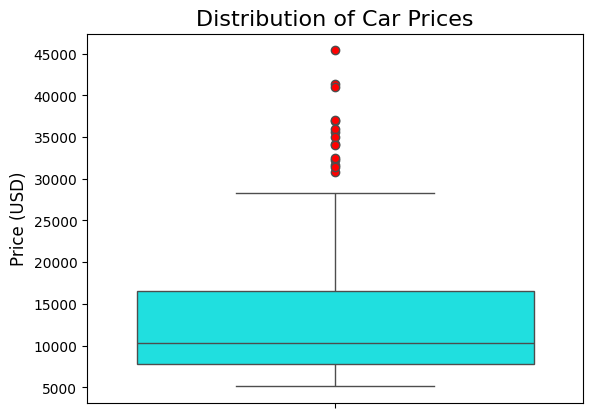

In [327]:
plt.title('Distribution of Car Prices', fontsize=16)
plt.ylabel('Price (USD)', fontsize=12)
sns.boxplot(y=df['price'], color="Aqua", flierprops=dict(markerfacecolor='red', marker='o'))
plt.show()

In [328]:
Q1 = df['price'].quantile(0.25)  # First quartile
Q3 = df['price'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1                    # Interquartile range

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Number of outlier rows is" , len(outliers))
print("Number of rows in the df is" , len(df))
print("Percentage of outliers in the df is", round((len(outliers)/len(df))*100,2), '%')


Number of outlier rows is 15
Number of rows in the df is 205
Percentage of outliers in the df is 7.32 %


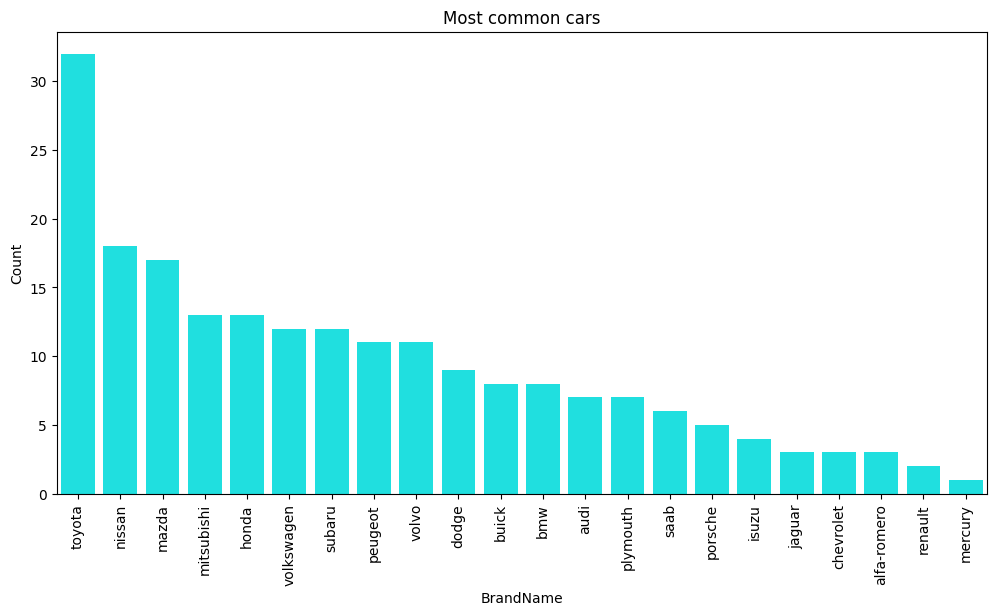

In [329]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=df['BrandName'].value_counts().index, y=df['BrandName'].value_counts().values, color="Aqua")
plt.xticks(rotation=90)  # Rotate labels by 90 degrees
plt.title('Most common cars')
plt.ylabel('Count')
plt.show()


In [330]:
df.head(1)

,symboling,BrandName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


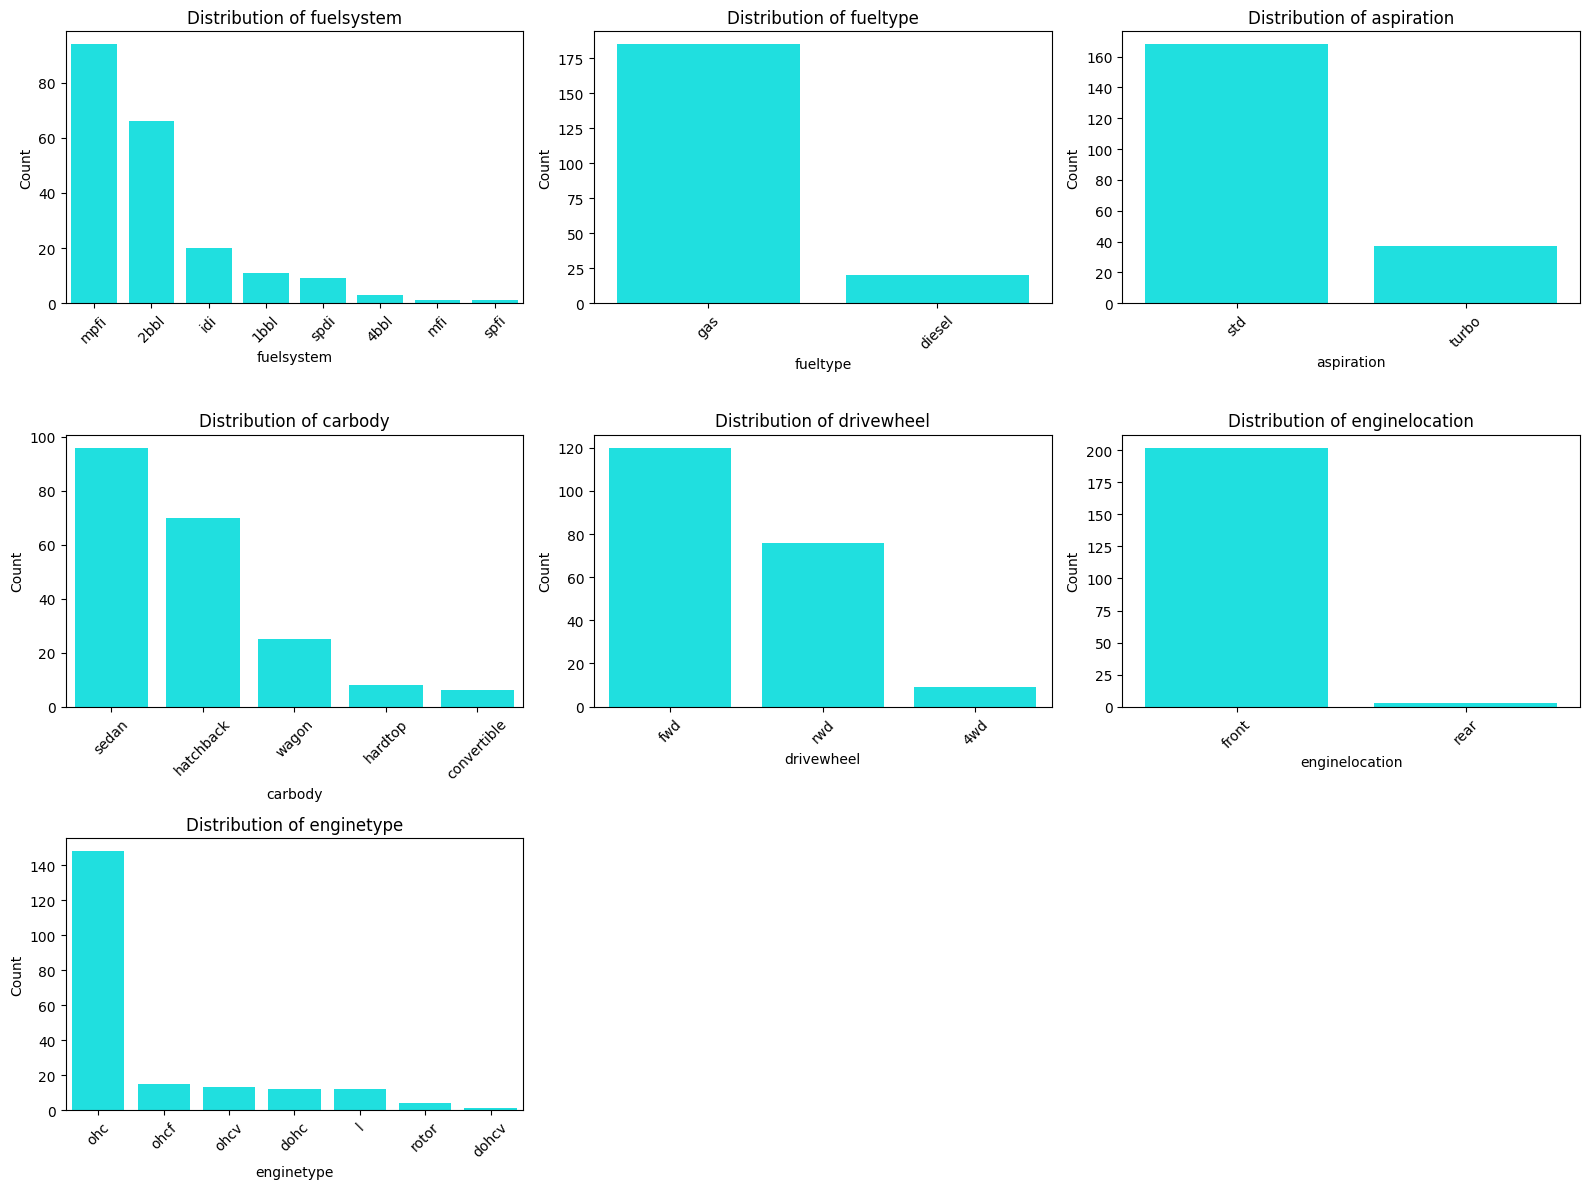

In [331]:
categorical_features = ['fuelsystem', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    plt.subplot(3, 3, i + 1)  # 2 rows and 3 columns grid layout
    sns.barplot(x=value_counts.index, y=value_counts.values, color="aqua")  
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


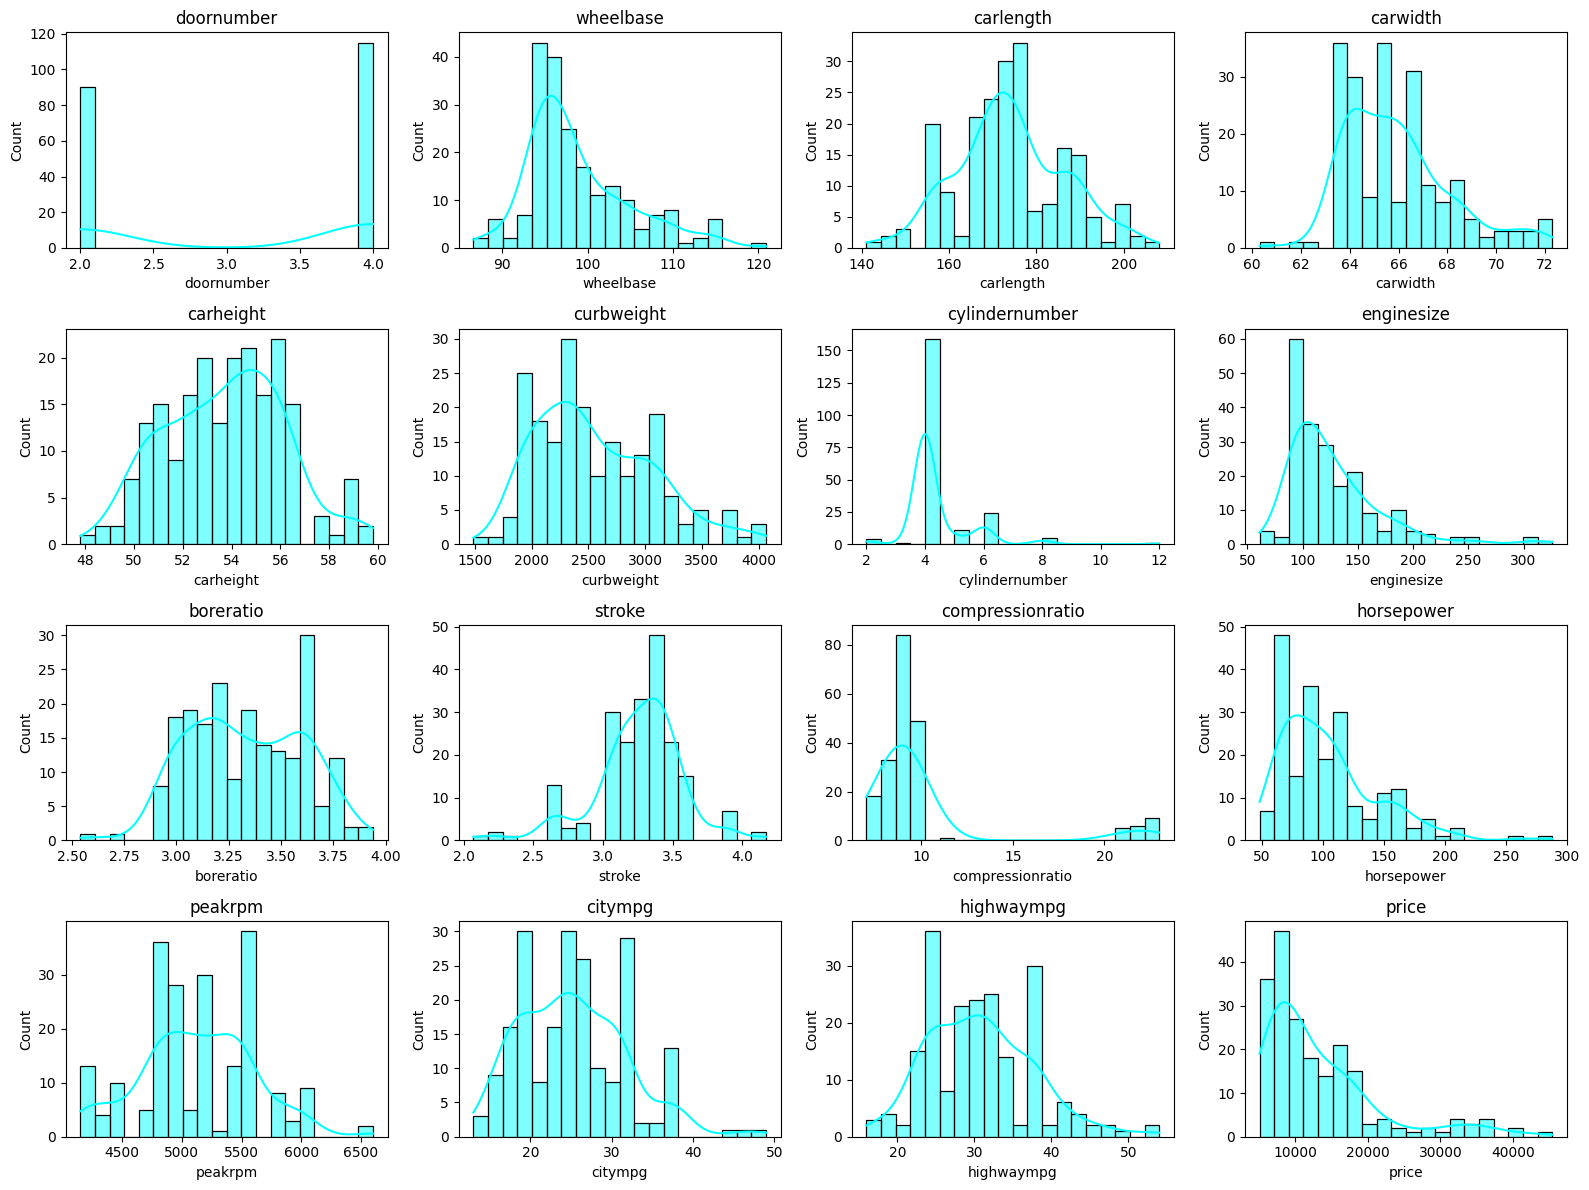

In [332]:
# Distribution of Numerical Features
numerical_features = ['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 
                      'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df[feature], bins=20, kde=True, color="aqua")
    plt.title(feature)
plt.tight_layout()
plt.show()

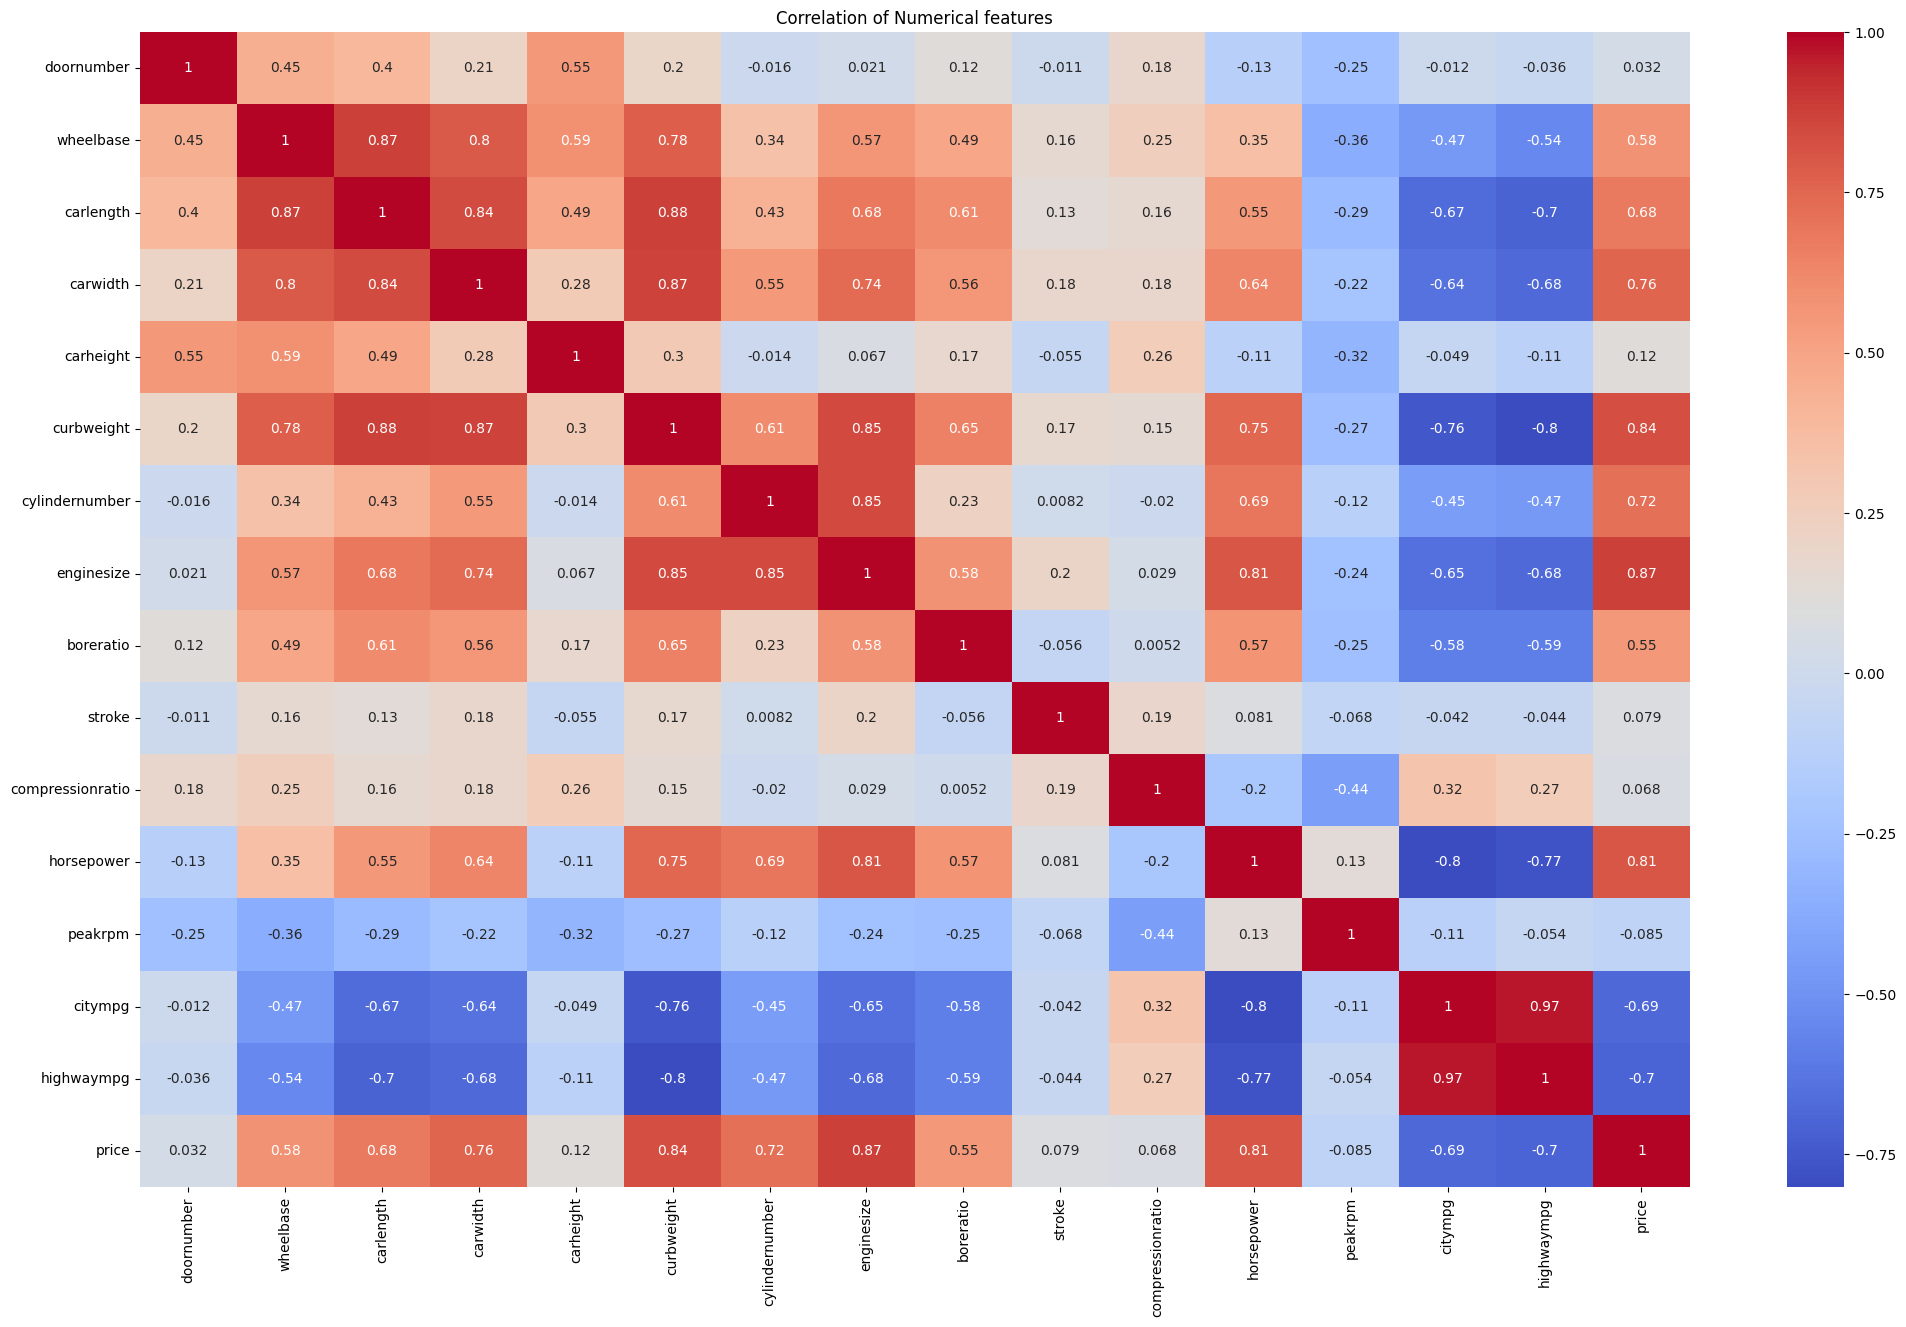

In [333]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Numerical features')
plt.show()

## Pre-processing Data

In [334]:
correlation_matrix['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [335]:
# Select features with high correlation with price using the heat map and the list above
Strong_positive_correlation_columns = ['carwidth', 'curbweight', 'enginesize', 'horsepower']
Strong_negative_correlation_columns = ['citympg', 'highwaympg']

low_correlation_columns = ['doornumber', 'stroke', 'compressionratio', 'peakrpm']

# Drop features with very low correlation with price, 
# e.g., doornumber (0.032), stroke (0.079), compressionratio (0.068), peakrpm(-0.085)

# Drop these columns
df = df.drop(columns=low_correlation_columns)

In [336]:
# Drop cylindernumber since it's highly correlated with enginesize
df = df.drop(columns=['cylindernumber'])

##### PCA analysis

In [337]:
# carlength & width into car dimensions
car_dimensions_df = df[['carlength', 'carwidth']]
print(type(car_dimensions_df))
car_dimensions_df.head()

<class 'pandas.core.frame.DataFrame'>


,carlength,carwidth
0,168.8,64.1
1,168.8,64.1
2,171.2,65.5
3,176.6,66.2
4,176.6,66.4


In [338]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(car_dimensions_df)

# Perform PCA
pca = PCA(n_components=1)  # We want one principal component
df['car_dimension'] = pca.fit_transform(data_standardized)

print("Explained variance ratio:", pca.explained_variance_ratio_) 
# If the explained variance ratio is high (e.g., > 0.9), it's safe to drop the original columns.

Explained variance ratio: [0.92055913]


In [339]:
df = df.drop(columns=['carlength', 'carwidth'])

In [340]:
# citympg/highwaympg into fuel efficiency
fuel_efficiency_df = df[['citympg', 'highwaympg']]
print(type(fuel_efficiency_df))
fuel_efficiency_df.head()

<class 'pandas.core.frame.DataFrame'>


,citympg,highwaympg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22


In [341]:
# Loop through the columns and print sorted unique values
for col in fuel_efficiency_df:
    unique_values = pd.Series(df[col].unique())  # Convert to Series
    print(f"Values in {col} are: {unique_values.sort_values().values}")
    # Check if the range is somewhat the same to perform either Normalization or Standardization

Values in citympg are: [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 45 47 49]
Values in highwaympg are: [16 17 18 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 41 42
 43 46 47 50 53 54]


In [342]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(fuel_efficiency_df)

# Perform PCA
pca = PCA(n_components=1)  # We want one principal component
df['fuel_efficiency'] = pca.fit_transform(data_standardized)

print("Explained variance ratio:", pca.explained_variance_ratio_) 
# If the explained variance ratio is high (e.g., > 0.9), it's safe to drop the original columns.

Explained variance ratio: [0.98566852]


Both Standardization & normalization for fuel_efficiency_df have explained variance ratio of over 90%

In [343]:
df = df.drop(columns=['citympg', 'highwaympg'])

In [344]:
# Standardize columns with different scales
cols_to_standardize_df = df[['symboling', 'wheelbase', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'horsepower']]

# Standardize the data
scaler = StandardScaler()
df[cols_to_standardize_df.columns] = scaler.fit_transform(cols_to_standardize_df)

df.head(2)

,symboling,BrandName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,price,car_dimension,fuel_efficiency
0,1.74347,alfa-romero,gas,std,convertible,rwd,front,-1.690772,-2.020417,-0.014566,dohc,0.074449,mpfi,0.519071,0.174483,13495.0,-0.898948,-0.843304
1,1.74347,alfa-romero,gas,std,convertible,rwd,front,-1.690772,-2.020417,-0.014566,dohc,0.074449,mpfi,0.519071,0.174483,16500.0,-0.898948,-0.843304


In [345]:
df.columns

Index(['symboling', 'BrandName', 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carheight', 'curbweight',
       'enginetype', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'price', 'car_dimension', 'fuel_efficiency'],
      dtype='object')

In [346]:
df = df[['BrandName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 
         'symboling', 'wheelbase', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'car_dimension', 
         'fuel_efficiency', 'price']]

df.head(2)

,BrandName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,horsepower,car_dimension,fuel_efficiency,price
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi,1.74347,-1.690772,-2.020417,-0.014566,0.074449,0.519071,0.174483,-0.898948,-0.843304,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi,1.74347,-1.690772,-2.020417,-0.014566,0.074449,0.519071,0.174483,-0.898948,-0.843304,16500.0


In [353]:
categorical_features = categorical_columns.append('BrandNAme')

In [354]:
# categorical_features.append('BrandName')
one_hot_df = pd.get_dummies(df, columns=categorical_features, dtype=int, drop_first=True)

In [355]:
one_hot_df.sample(2)

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,horsepower,car_dimension,fuel_efficiency,price,BrandName_audi,BrandName_bmw,BrandName_buick,BrandName_chevrolet,BrandName_dodge,BrandName_honda,BrandName_isuzu,BrandName_jaguar,BrandName_mazda,BrandName_mercury,BrandName_mitsubishi,BrandName_nissan,BrandName_peugeot,BrandName_plymouth,BrandName_porsche,BrandName_renault,BrandName_saab,BrandName_subaru,BrandName_toyota,BrandName_volkswagen,BrandName_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
166,0.133509,-0.708596,-0.461478,-0.492032,-0.695874,-0.332206,0.199833,-0.937736,-0.095692,9538.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
201,-1.476452,1.721873,0.728239,0.949992,0.339248,1.666445,1.416637,1.803167,-1.265868,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Split Dataset

In [356]:
X = one_hot_df.drop('price', axis=1)  # Features
y = one_hot_df['price']  # Target variable

In [357]:
# Split into training and testing sets ()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [358]:
model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)  # Train the model on training data

LinearRegression()

In [359]:
print(X_train.columns)

Index(['symboling', 'wheelbase', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'car_dimension', 'fuel_efficiency',
       'BrandName_audi', 'BrandName_bmw', 'BrandName_buick',
       'BrandName_chevrolet', 'BrandName_dodge', 'BrandName_honda',
       'BrandName_isuzu', 'BrandName_jaguar', 'BrandName_mazda',
       'BrandName_mercury', 'BrandName_mitsubishi', 'BrandName_nissan',
       'BrandName_peugeot', 'BrandName_plymouth', 'BrandName_porsche',
       'BrandName_renault', 'BrandName_saab', 'BrandName_subaru',
       'BrandName_toyota', 'BrandName_volkswagen', 'BrandName_volvo',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fue

In [360]:
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

                 Feature  Coefficient
10         BrandName_bmw  8095.769578
23     BrandName_porsche  7269.952792
11       BrandName_buick  6920.622277
38   enginelocation_rear  5701.688148
44      enginetype_rotor  3924.326520
42       enginetype_ohcf  3029.801531
16      BrandName_jaguar  2874.678891
3             curbweight  2688.652702
6             horsepower  2206.926116
25        BrandName_saab  1575.865864
4             enginesize  1385.743371
1              wheelbase  1349.968502
45       fuelsystem_2bbl  1138.356909
9         BrandName_audi  1057.083424
29       BrandName_volvo   868.645500
41        enginetype_ohc   803.429235
50       fuelsystem_spdi   577.902388
8        fuel_efficiency   442.676101
47        fuelsystem_idi   402.940310
49       fuelsystem_mpfi   263.398835
31      aspiration_turbo   231.215978
0              symboling   138.898046
7          car_dimension   108.861915
51       fuelsystem_spfi     0.000000
37        drivewheel_rwd   -95.228289
17       Bra

In [361]:
y_pred = model.predict(X_test)
y_pred

array([33199.17292323,  6983.23407218, 10637.46310963, 26471.20484347,
         111.94231085,  6084.68117472,  9667.73540522, 15731.49120107,
       11584.06197558, 10001.2261905 ,  8809.52671763,  5325.90275696,
       37032.70060313, 17711.89600703, 14355.05383507,  8825.05583395,
        5465.38140636,  9792.15597823,  5621.03898896,  8876.46971904,
       22047.07033212, 29422.40315118, 32904.14391538,  7009.11593271,
        7570.48322609,  6444.93812097, 17559.69079474, 13940.40853823,
       17537.20695575, 13496.37748654,  9936.13216135, 16848.10853713,
        5521.23344365,  9676.72487999, 11173.15778174,  7348.14998342,
       18129.80136846,  9089.15987179,  6771.93866933, 20419.53798643,
        7311.62128499])

In [362]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"MSE: {mse}")

MAE: 1753.5963322990706
R^2: 0.9138156439782816
MSE: 7473736.059386393


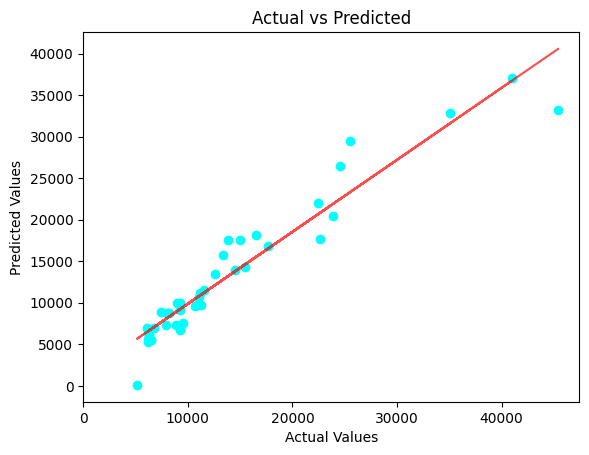

In [363]:
# Visualization
plt.scatter(y_test, y_pred, color="aqua")
m, b = np.polyfit(y_test, y_pred, 1)  # Linear fit (degree 1)
best_fit_line = m * np.array(y_test) + b

# Plot the line of best fit
plt.plot(y_test, best_fit_line, color="red", alpha=0.7)

# Set x-axis to start from 0
plt.xlim(left=0)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()